In [123]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [124]:
data_train = pathlib.Path("C:\\Users\\HP\\Desktop\\pythonProject\\machineLearning\\train")
data_test = pathlib.Path("C:\\Users\\HP\\Desktop\\pythonProject\\machineLearning\\test")

In [125]:
image_count1 = len(list(data_train.glob('*/*.jpg')))
image_count2 = len(list(data_test.glob('*/*.jpg')))
print(image_count1)
print(image_count2)

1156
502


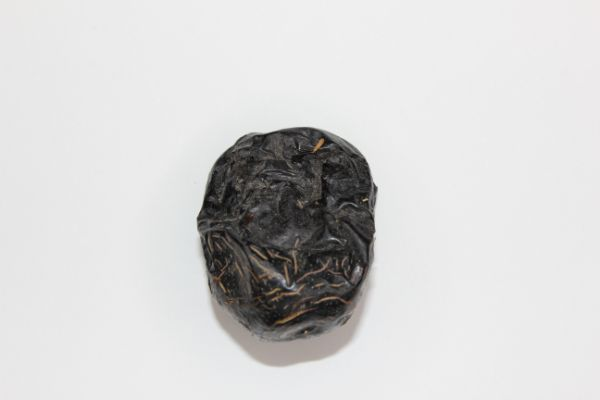

In [126]:
Ajwa = list(data_train.glob('Ajwa/*'))
PIL.Image.open(str(Ajwa[0]))

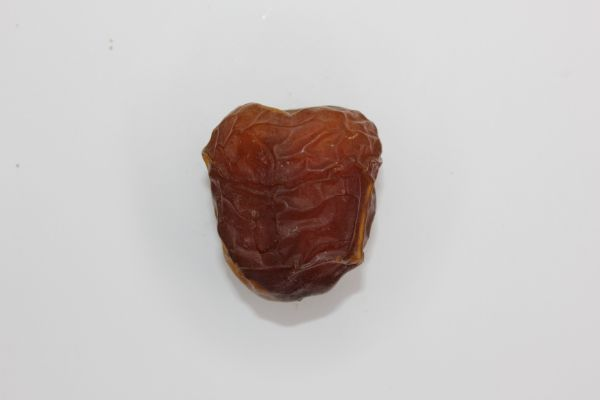

In [127]:
Galaxy = list(data_train.glob('Galaxy/*'))
PIL.Image.open(str(Galaxy[0]))

In [128]:
batch_size = 32
img_height = 180
img_width = 180

print("Train info:")
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print("Validation info:")
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print("Testing info:")
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_test,  # Ensure this path points to your testing data directory
    image_size=(img_height, img_width),
    batch_size=batch_size)

Train info:
Found 1156 files belonging to 9 classes.
Using 925 files for training.
Validation info:
Found 1156 files belonging to 9 classes.
Using 231 files for validation.
Testing info:
Found 502 files belonging to 9 classes.


In [129]:
class_names = train_ds.class_names
print("Classes in the dataset:", class_names)

Classes in the dataset: ['Ajwa', 'Galaxy', 'Mejdool', 'Meneifi', 'NabtatAli', 'Rutab', 'Shaishe', 'Sokari', 'Sugaey']


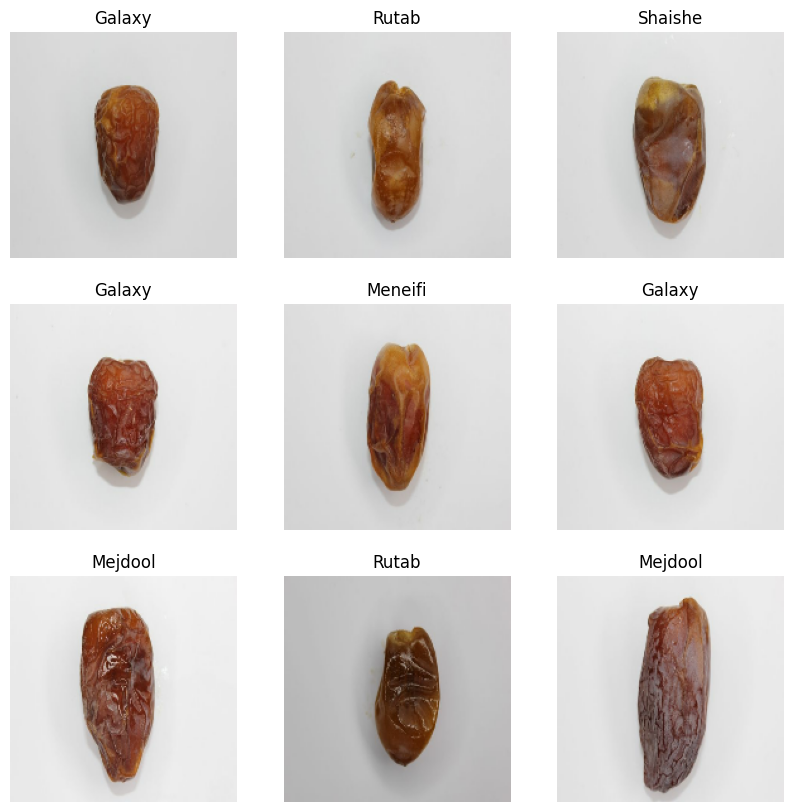

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [131]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [132]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.01089319 0.9113271


In [133]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_26 (Rescaling)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [134]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 202ms/step - accuracy: 0.1108 - loss: 3.2244 - val_accuracy: 0.2900 - val_loss: 2.0360
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - accuracy: 0.3663 - loss: 1.8797 - val_accuracy: 0.3983 - val_loss: 1.5074
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - accuracy: 0.5343 - loss: 1.2853 - val_accuracy: 0.6970 - val_loss: 1.0284
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.7114 - loss: 0.9070 - val_accuracy: 0.7316 - val_loss: 0.8703
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.7173 - loss: 0.7840 - val_accuracy: 0.6926 - val_loss: 0.9542
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.7786 - loss: 0.6706 - val_accuracy: 0.8095 - val_loss: 0.6209
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.8338 - loss: 0.4858 - val_accuracy: 0.8139 - val_loss: 0.6048
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.8791 - loss: 0.4187 - val_accuracy: 0.

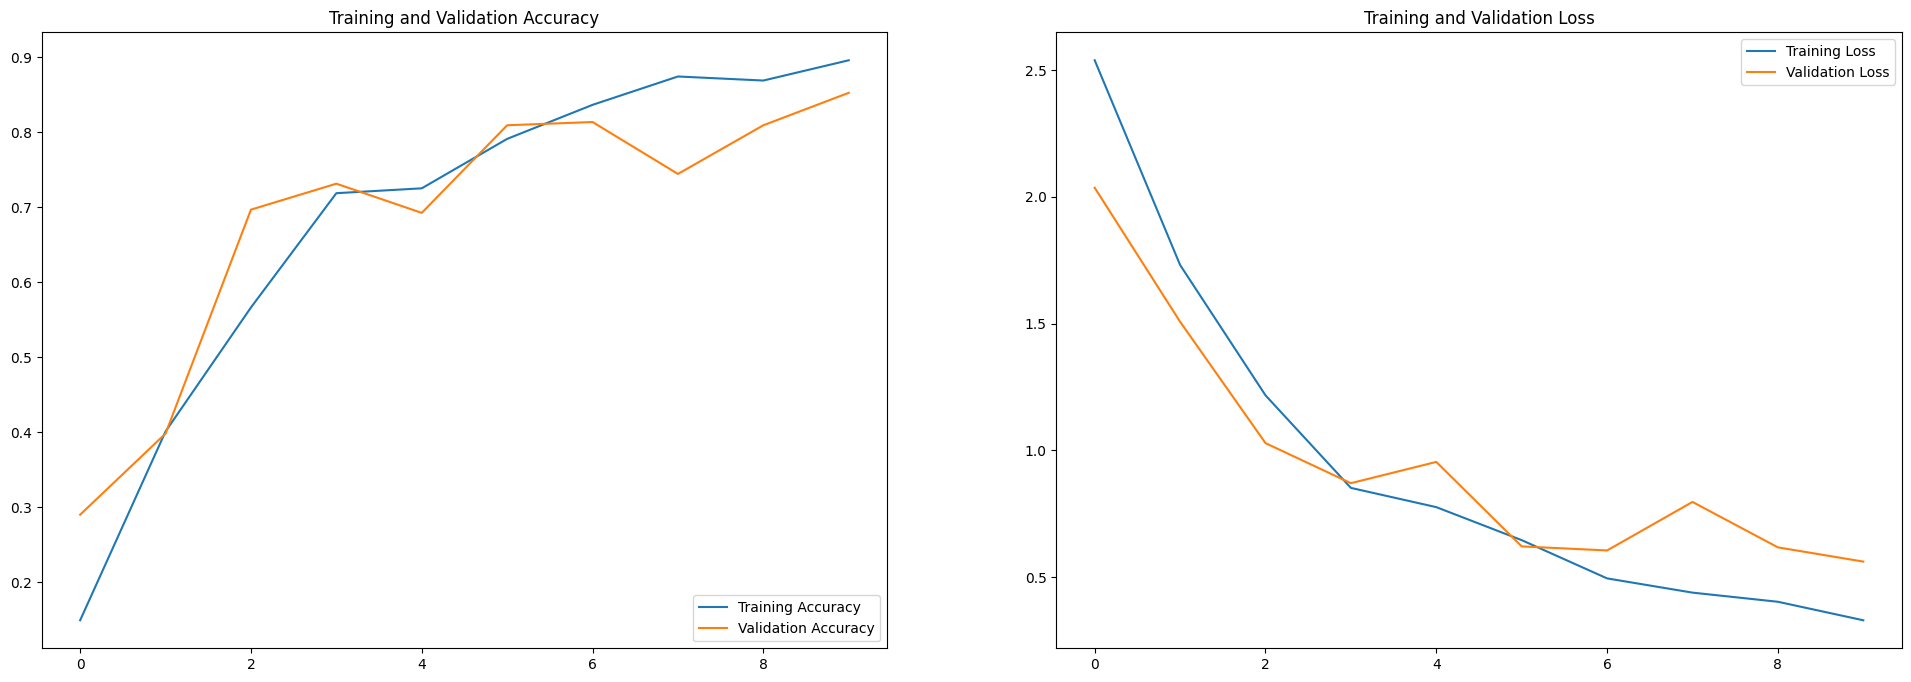

In [135]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Accuracy: 0.8326693227091634
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.94      0.89      0.92        57
           2       0.89      0.78      0.83        41
           3       0.91      0.56      0.69        70
           4       0.64      0.94 

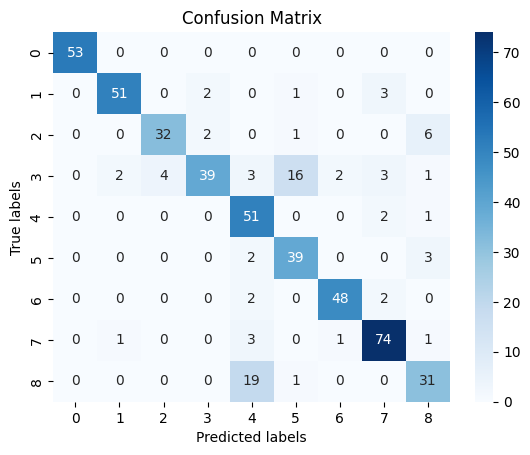

In [136]:
# Convert predictions to class names
from sklearn.metrics import accuracy_score
import numpy as np

true_labels = []
predicted_labels = []

for images, labels in test_ds:
    print("hi")
    true_labels.extend(labels.numpy())  # Get true labels
    predictions = model.predict(images)  # Get predictions
    predicted_labels.extend([np.argmax(pred) for pred in predictions])  # Get predicted labels

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

from sklearn.metrics import classification_report

print(classification_report(true_labels, predicted_labels))

import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()